# Project: Finite Element Methods for Stokes Equations

The purpose of this project is to implement some simple and popular finite
element pairs for solving the Stokes equations in two dimensions.

## Part I: isoP2-P0 element

Given a triangulation `(node,elem)`, the velocity space $\mathbf u = (u, \; v)$ is the linear
finite element space on the uniform refinement of `(node,elem)` and the pressure is piecewise constant space on the current mesh.

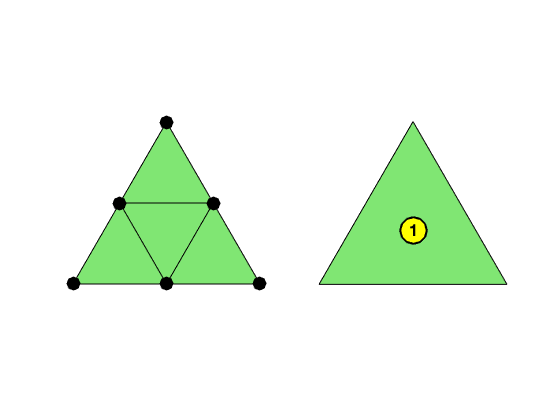

In [8]:
node = [0,0; 1,0; 0.5, sqrt(3)/2];
elem = [1, 2, 3];
subplot(1,2,2); showmesh(node,elem); findelem(node,elem);
[node,elem] = uniformrefine(node,elem);
subplot(1,2,1); showmesh(node,elem); findnode(node,'all','noindex','MarkerSize',36);

### Step 1: Data Structure
The current mesh will be refered as a coarse mesh and a uniform refined mesh is the fine mesh.

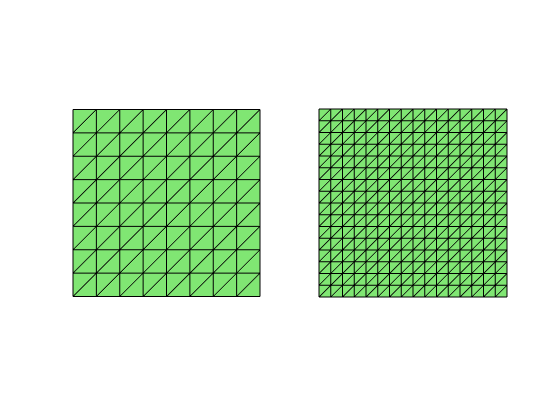

In [1]:
[node,elem] = squaremesh([-1,1,-1,1],0.25);
subplot(1,2,1); showmesh(node,elem);
NTc = size(elem,1);
% Uniform refinement to get a fine grid
[node,elem] = uniformrefine(node,elem);
subplot(1,2,2); showmesh(node,elem);

In the `uniformrefine`, the new elements are added in such an order that
triangles `(t, NTc + t, 2*NTc + t, 3*NTc + t)` are refined from the same
parent, where `NTc` is the number of triangles in the coarse grid.

### Step 2: Form the matrix equation for Laplacian

Call your code on the linear finite element method for Poisson equation to get the discrete Laplacian matrix. See [Project: Linear Finite Element Methods](projectFEM.html). Merge two copies of the Laplacian matrix using `blkdiag`.

### Step 3: Form the matrix for the divergence operator

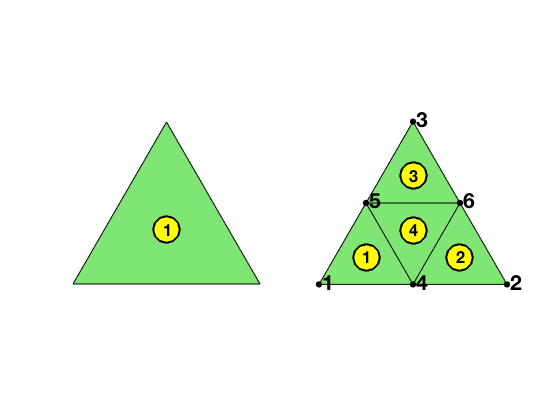

In [9]:
node = [0,0; 1,0; 0.5, sqrt(3)/2];
elem = [1, 2, 3];
subplot(1,2,1); showmesh(node,elem); findelem(node,elem);
[node,elem] = uniformrefine(node,elem);
subplot(1,2,2); showmesh(node,elem); findnode(node); findelem(node,elem);

In one triangle, the $-div$ matrix will be a matrix of size $12\times 1$ which maps the velocity (12 dimensions as the piecewise linear in the fine mesh and two components) to the coarse triangle. Expand the linear element into the barycentric coordinate, and compute $\nabla \lambda_i$ on the fine grid 

    [Dlambda,area] = gradbasis(node,elem);

Assemble the sparse matrice for the divergence operator on the fine grid by
computing 
$$
-\int_t [\partial_x \lambda_1 \; \partial_x \lambda_2 \; \partial_x \lambda_3 \; \partial_y \lambda_1 \; \partial_y \lambda_2 \; \partial_y \lambda_3]\; dx.
$$

Merge four terms in the above matrix to compute the divergence operator
on the coarse grid
$$-\int_{t\cup (NTc + t) \cup  (2NTc + t) \cup (3NTc + t)} \, \partial_x u + \partial_y v \, dx.$$

### Step 4: Boundary conditions

Modify the right hand side to include Dirichlet or Neumann boundary
conditions. It is the same as the Poisson equation but remember to repeat for each
component of the velocity. For non-homogenous Dirichlet boundary condition, you need to
modify the continunity equation too. Record freeDof of velocity.

### Step 4: Solve the linear system

Form a big matrix `bigA = [A B'; B sparse(Np,Np)]` and use the
direct solver to solve `bigA(bigFreeDof,bigFreeDof)\bigF(bigFreeDof)`

Since the pressure is unique up to a constant, you need to eliminate the
constant kernel by not including one component of pressure vector in the
`bigFreeDof`. After you get the solution, you need to modify p such that
its weighted mean value is zero.

## Part II: nonforming P1-P0 element


### Step 1: Data Structure
Since the unknowns are associated to edges, you need to generate edges
and more importantly the indices map from a triangle to global indices of
its three edges.  The edges are labled such that the i-th edge is
opposite to the i-th vertex for i=1,2,3.


elem2edge =

           3           2           1



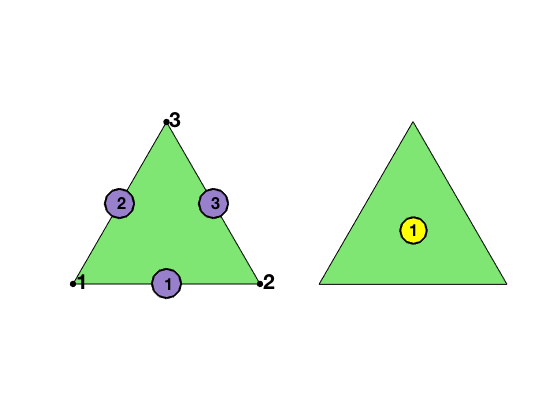

In [1]:
clear all;
node = [0,0; 1,0; 0.5, sqrt(3)/2];
elem = [1, 2, 3];
[elem2edge,edge] = dofedge(elem);
subplot(1,2,1); showmesh(node,elem); findnode(node); findedge(node,edge);
subplot(1,2,2); showmesh(node,elem); findelem(node,elem);
display(elem2edge)

### Step 2: Form the matrix equation

Figure out the basis of CR element using the barycenteric coordinates. 

Call your code for linear finite element methods in Part I with the
correct correction to CR element.

Compute the righ hand side using three middle point rule. It is even
simplier than linear element case.

### Step 3: Boundary conditions

Similar as in the linear element case. Just be careful on the Dirichlet
boundary condition, you need to evaluate g_D at middle points of boundary
edges.

To find out the boundary edges, use

    s = accumarray(elem2edge(:), 1, [size(edge,1) 1]);

Then `idx = (s==1)` is the index of boundary edges and the set for `(s==2)` is interiori (free) edges.

### Step 4: Solve the linear system

Same as the first Part.

## Test Example

We use a simple model of colliding flow with analytic solutions to test
the code. The domain is $[-1,1]^2$ and the analytic solution is:

$$u = 20xy^3; v = 5x^4 - 5y^4; \quad p = 60x^2y - 20y^3 + constant.$$

Compute the data f and Dirichlet boundary condition g_D and solve Stokes
equation on the unit square using methods in Part I,II and check the
rate of convergence.